In [1]:
from gensim.models import Word2Vec, KeyedVectors
import pandas as pd
import nltk
import os
# from tqdm import tqdm

In [2]:
# https://gist.github.com/iamaziz/8d8d8c08c7eeda707b9e
def w2v_model_accuracy(model):

    accuracy = model.accuracy("src/questions-words.txt")
    
    sum_corr = len(accuracy[-1]['correct'])
    sum_incorr = len(accuracy[-1]['incorrect'])
    total = sum_corr + sum_incorr
    percent = lambda a: a / total * 100
    
    returnList = []
    returnList.append(total)
    returnList.append(percent(sum_corr))
    returnList.append(percent(sum_incorr))
    
    print(str(model))
    print('Total sentences: {}, Correct: {:.2f}%, Incorrect: {:.2f}%'.format(total, percent(sum_corr), percent(sum_incorr)))
    return returnList

In [3]:
def importModels(publication):
    directory = 'models/publicationsSkipgram/'+publication
#     directory = 'models/'+publication
    for filename in os.listdir(directory):
        if filename.endswith(".model"):
            splittedFileName = (filename.split('.')[0]).split('-')
            exec(splittedFileName[0]+"_"+splittedFileName[1]+"_"+splittedFileName[2]+"_"+splittedFileName[3] + " = Word2Vec.load(\"/Users/nirbhey/Desktop/temp/" + directory + "/" + filename + "\")", globals())
        else:
            continue

In [4]:
def compareModelAccuracies(clear):
    if clear:
        modelAccuracies = {}
    for var in list(globals().items()):
        print(str(var[0]))
        try:
            exec("modelAccuracies[\""+var[0]+"\"]=w2v_model_accuracy("+var[0]+")")
        except AttributeError:
            print("AttributeError")
        except TypeError:
            print("TypeError")
            continue
    return modelAccuracies
        

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def plotModelAccuracies(accuracies, publication):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x =[]
    y =[]
    z =[]

    # print(modelAccuracies)
    for model in accuracies:
        variables = model.split("_")

        x.append(int(variables[1]))
        y.append(int(variables[2]))
        z.append(modelAccuracies[model][1])

    ax.scatter(x, y, z, c=y, marker='o')

    ax.set_xlabel('Size')
    ax.set_ylabel('Window')
    ax.set_zlabel('Correct(%)')

    plt.savefig(os.getcwd()+"/models/publicationsSkipgram/"+publication+"/skipgramplot1.png")
#     plt.savefig(os.getcwd()+"/models/"+publication+"/cbowplot1.png")
    plt.show()

In [6]:
# plotModelAccuracies(modelAccuracies,"Atlantic")

In [7]:
import matplotlib.cbook as cbook
from matplotlib.pyplot import figure

def seeModelAccuracies(accuracies, publication):
    x =[]
    y =[]
    z =[]

    # print(modelAccuracies)
    for model in accuracies:
        variables = model.split("_")

        x.append(int(variables[1]))
        y.append(int(variables[2]))
        z.append(modelAccuracies[model][1])
        
    volume = [((size*200)-500) for size in z]

    fig, ax = plt.subplots()
    ax.scatter(x, y, s=volume,alpha=0.5)

    ax.set_xlabel(r'size', fontsize=15)
    ax.set_ylabel(r'window', fontsize=15)
    ax.set_title('correct')

    ax.grid(True)
    fig.tight_layout()

    plt.savefig(os.getcwd()+"/models/publicationsSkipgram/"+publication+"/skipgramplot2.png")
#     plt.savefig(os.getcwd()+"/models/"+publication+"/cbowplot2.png")
    plt.show()

In [8]:
# seeModelAccuracies(modelAccuracies,"Atlantic")

__name__
AttributeError
__doc__
AttributeError
__package__
AttributeError
__loader__
AttributeError
__spec__
AttributeError
__builtin__
AttributeError
__builtins__
AttributeError
_ih
AttributeError
_oh
AttributeError
_dh
AttributeError
In
AttributeError
Out
AttributeError
get_ipython
AttributeError
exit
AttributeError
quit
AttributeError
_
AttributeError
__
AttributeError
___
AttributeError
_i
AttributeError
_ii
AttributeError
_iii
AttributeError
_i1
AttributeError
Word2Vec
TypeError
KeyedVectors
TypeError
pd
AttributeError
nltk
TypeError
os
AttributeError
_i2
AttributeError
w2v_model_accuracy
AttributeError
_i3
AttributeError
importModels
AttributeError
_i4
AttributeError
compareModelAccuracies
AttributeError
_i5
AttributeError
Axes3D
AttributeError
plt
AttributeError
np
AttributeError
plotModelAccuracies
AttributeError
_i6
AttributeError
_i7
AttributeError
cbook
AttributeError
figure
AttributeError
seeModelAccuracies
AttributeError
_i8
AttributeError
_i9
AttributeError
publications
A

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.wv.evaluate_word_analogies() instead).
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.evaluate_word_analogies() instead).
  after removing the cwd from sys.path.


Word2Vec(vocab=94003, size=150, alpha=0.025)
Total sentences: 12817, Correct: 18.05%, Incorrect: 81.95%
model_125_15_0
Word2Vec(vocab=94003, size=125, alpha=0.025)
Total sentences: 12817, Correct: 17.58%, Incorrect: 82.42%


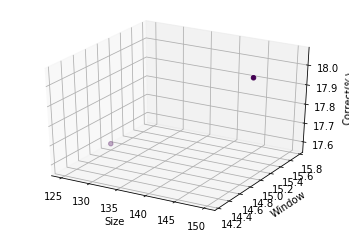

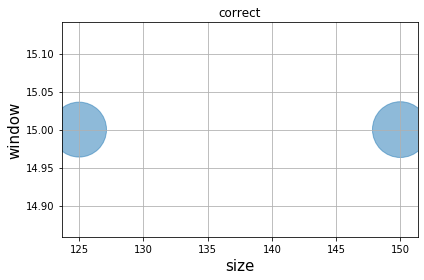

In [9]:
publications = ['New York Times'] #,'CNN', 'Breitbart', 'New York Post', 'Guardian', 'NPR', 'Reuters', 'Vox', 'Washington Post', 'Atlantic', 'Fox News', 'Buzzfeed News', 'National Review']

for publication in publications:
    importModels(publication)
    modelAccuracies = compareModelAccuracies(True)
    file = open("models/publicationsSkipgram/"+publication+"/"+publication+" skipgram.txt", "w") 
#     file = open("models/"+publication+"/cbowresults.txt", "w")
    file.write("model:[vocabulary,percentage_correct,percentage_incorrect]")
    for accuracy in modelAccuracies:
        file.write("\n"+str(accuracy)+":"+str(modelAccuracies[accuracy])) 
    file.close() 
    plotModelAccuracies(modelAccuracies,publication)
    seeModelAccuracies(modelAccuracies,publication)